# Task 2: Customer Segmentation

Building a K-Means clustering model to segment customers into distinct groups based on income and spending behavior using the Mall Customer dataset.

## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Loading and Exploring Data

In [19]:
import io
import requests
import os

df = None

# Try to load dataset (Option A: Online)
print("Attempting to load dataset...\n")

urls = [
    'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/Mall_Customers.csv',
    'https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/mall_customers.csv'
]

for url in urls:
    try:
        df = pd.read_csv(url)
        print(f"✓ Dataset loaded successfully from online source")
        break
    except Exception as e:
        continue

# If online fails, try local file (Option B: Local)
if df is None:
    print("Online loading failed. Attempting local file...\n")
    
    # Direct absolute path
    project_dir = r'C:\Users\grcla\OneDrive\Desktop\elevvo internship tasks\Task_2_Customer_Segmentation'
    
    local_files = [
        os.path.join(project_dir, 'Mall Customers.xls'),
        os.path.join(project_dir, 'Mall_Customers.csv'),
    ]
    
    for file_path in local_files:
        try:
            if os.path.exists(file_path):
                print(f"Found file: {file_path}")
                if file_path.endswith('.xls'):
                    df = pd.read_excel(file_path, engine='xlrd')
                    print(f"✓ Successfully loaded from Excel file\n")
                    break
                elif file_path.endswith('.xlsx'):
                    df = pd.read_excel(file_path, engine='openpyxl')
                    print(f"✓ Successfully loaded from Excel file\n")
                    break
                else:
                    df = pd.read_csv(file_path, encoding='latin-1')
                    print(f"✓ Successfully loaded from CSV file\n")
                    break
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue

if df is not None:
    print(f'Dataset Statistics:')
    print(f'Total records: {len(df)}')
    print(f'\nColumns: {list(df.columns)}')
    print(f'\nFirst few rows:')
    print(df.head(10))
    print(f'\nData types:')
    print(df.dtypes)
    print(f'\nMissing values:')
    print(df.isnull().sum())
else:
    print("\n" + "="*80)
    print("⚠️  DATASET NOT LOADED")
    print("="*80)
    print("\nThe dataset file was not found. Please download it:")
    print("Link: https://www.kaggle.com/datasets/vjcde/customer-segmentation-tutorial-in-python")
    print("\nPlace the file in:")
    print(f"{project_dir}")
    print("\nSupported formats: 'Mall Customers.xls' or 'Mall_Customers.csv'")
    print("="*80)

Attempting to load dataset...

Online loading failed. Attempting local file...

Found file: C:\Users\grcla\OneDrive\Desktop\elevvo internship tasks\Task_2_Customer_Segmentation\Mall Customers.xls
Error loading C:\Users\grcla\OneDrive\Desktop\elevvo internship tasks\Task_2_Customer_Segmentation\Mall Customers.xls: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.
Found file: C:\Users\grcla\OneDrive\Desktop\elevvo internship tasks\Task_2_Customer_Segmentation\Mall_Customers.csv
✓ Successfully loaded from CSV file

Dataset Statistics:
Total records: 200

Columns: ['CustomerID', 'Gender', 'Age', 'Education ', 'Marital Status', 'Annual Income (k$)', 'Spending Score (1-100)']

First few rows:
   CustomerID Gender  Age   Education  Marital Status  Annual Income (k$)  \
0           1      M   19  High School        Married                  15   
1           2      M   21     Graduate         Single                  15   
2        

In [20]:
if df is not None:
    print(df.describe())
    print(f'\nDataset Statistics:')
    print(f'Age Range: {df["Age"].min()} - {df["Age"].max()}')
    print(f'Annual Income Range: ${df["Annual Income (k$)"].min()}k - ${df["Annual Income (k$)"].max()}k')
    print(f'Spending Score Range: {df["Spending Score (1-100)"].min()} - {df["Spending Score (1-100)"].max()}')
    print(f'Gender Distribution:')
    print(df['Gender'].value_counts())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Dataset Statistics:
Age Range: 18 - 70
Annual Income Range: $15k - $137k
Spending Score Range: 1 - 99
Gender Distribution:
Gender
F    112
M     88
Name: count, dtype: int64


## Data Visualization

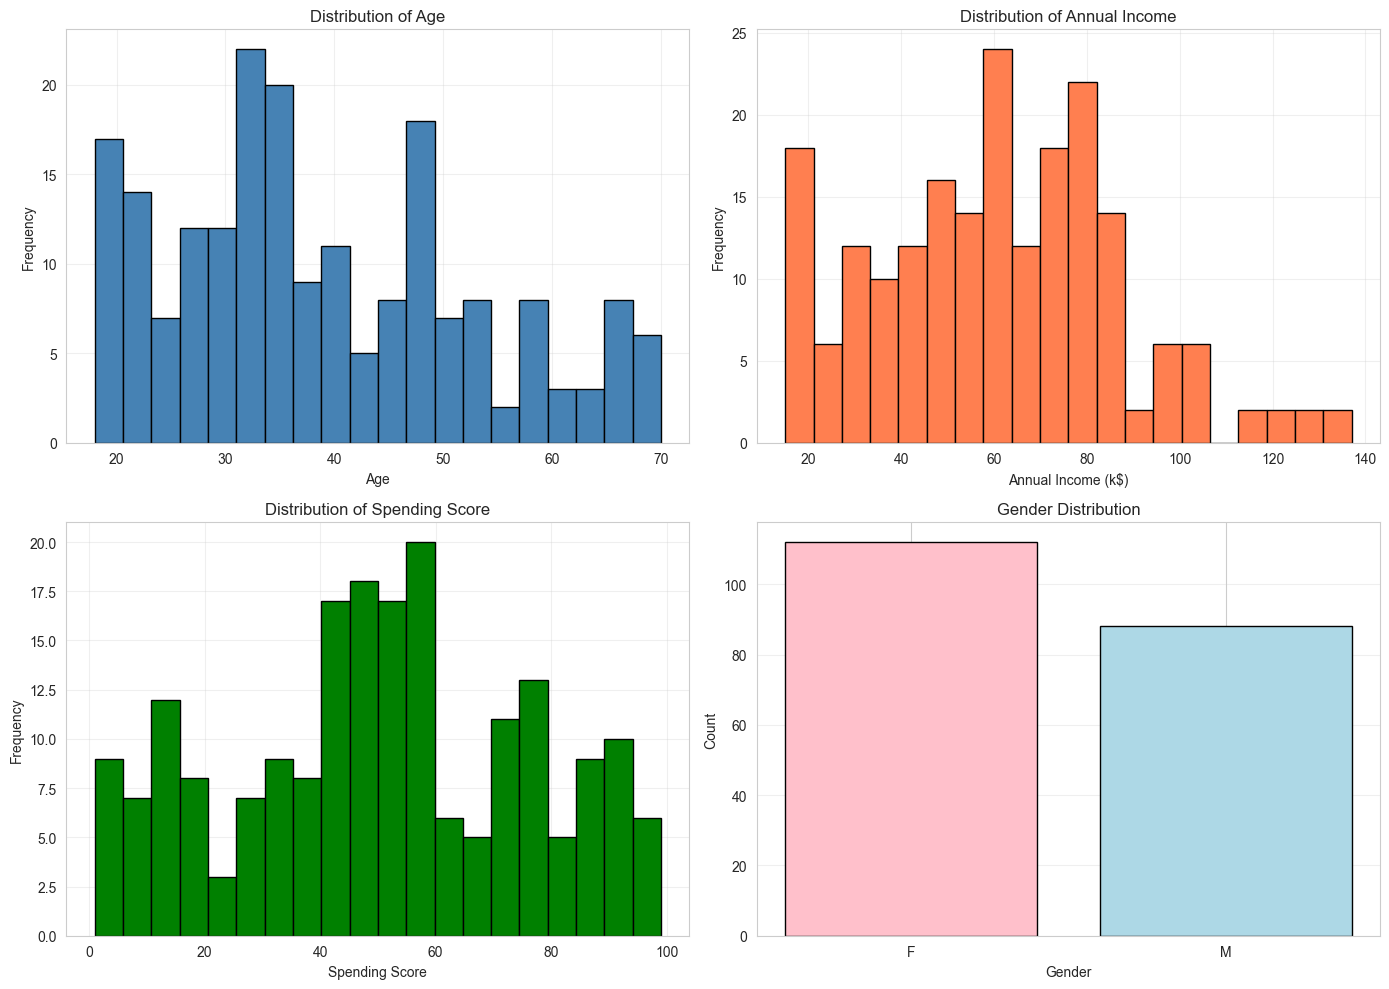

In [21]:
import os

if df is not None:
    os.makedirs('../outputs/', exist_ok=True)
    
    # Distribution plots for numerical features
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].hist(df['Age'], bins=20, color='steelblue', edgecolor='black')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Age')
    axes[0, 0].grid(alpha=0.3)
    
    axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Annual Income (k$)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution of Annual Income')
    axes[0, 1].grid(alpha=0.3)
    
    axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, color='green', edgecolor='black')
    axes[1, 0].set_xlabel('Spending Score')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Spending Score')
    axes[1, 0].grid(alpha=0.3)
    
    gender_counts = df['Gender'].value_counts()
    axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['pink', 'lightblue'], edgecolor='black')
    axes[1, 1].set_xlabel('Gender')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Gender Distribution')
    axes[1, 1].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../outputs/distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

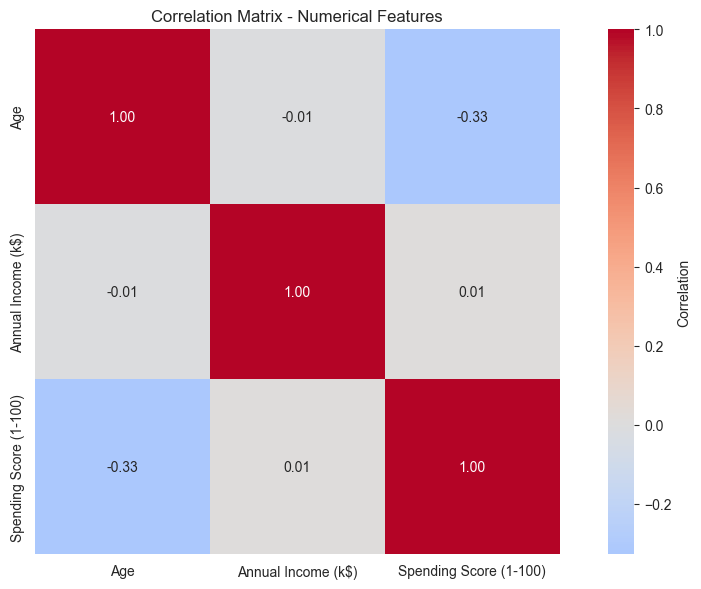

In [22]:
if df is not None:
    # Correlation heatmap for numerical features
    df_numeric = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
    
    plt.figure(figsize=(10, 6))
    correlation = df_numeric.corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix - Numerical Features')
    plt.tight_layout()
    plt.savefig('../outputs/correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

## Data Preparation for Clustering

In [23]:
if df is not None:
    # Selecting features for clustering (Annual Income and Spending Score)
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
    
    # Scaling features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f'Features selected: {X.columns.tolist()}')
    print(f'Data shape: {X.shape}')
    print(f'\nScaled data summary:')
    print(f'Mean: {X_scaled.mean(axis=0)}')
    print(f'Std Dev: {X_scaled.std(axis=0)}')

Features selected: ['Annual Income (k$)', 'Spending Score (1-100)']
Data shape: (200, 2)

Scaled data summary:
Mean: [-2.13162821e-16 -1.46549439e-16]
Std Dev: [1. 1.]


## Elbow Method - Determining Optimal Clusters

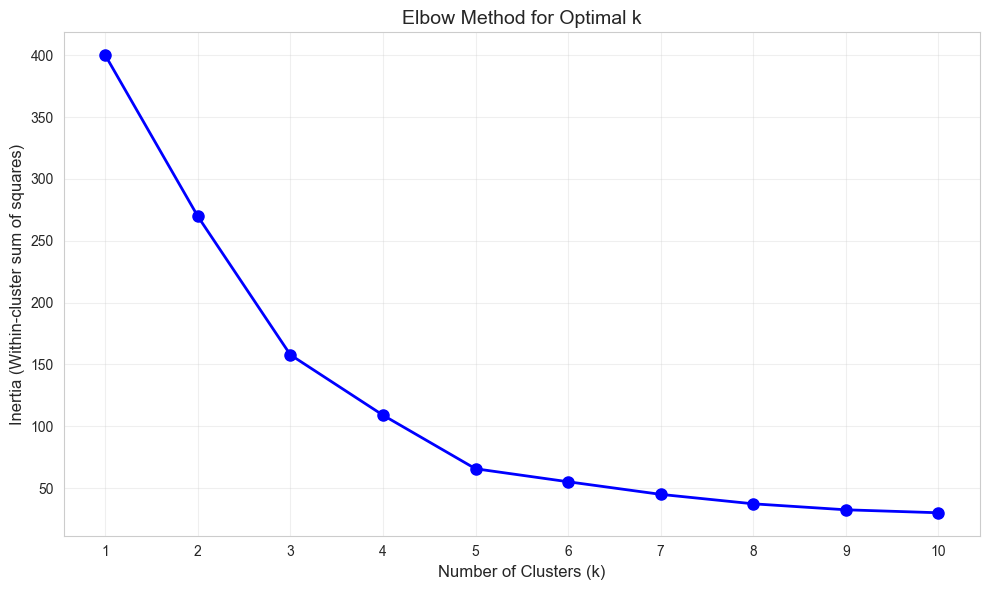

Inertia values for different k:
k=1: 400.00
k=2: 269.69
k=3: 157.70
k=4: 108.92
k=5: 65.57
k=6: 55.06
k=7: 44.86
k=8: 37.23
k=9: 32.39
k=10: 29.98


In [24]:
if df is not None:
    # Computing inertia for different cluster numbers
    inertias = []
    K_range = range(1, 11)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Plotting elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
    plt.title('Elbow Method for Optimal k', fontsize=14)
    plt.grid(alpha=0.3)
    plt.xticks(K_range)
    plt.tight_layout()
    plt.savefig('../outputs/elbow_method.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('Inertia values for different k:')
    for k, inertia in zip(K_range, inertias):
        print(f'k={k}: {inertia:.2f}')

## Silhouette Analysis - Cluster Quality Evaluation

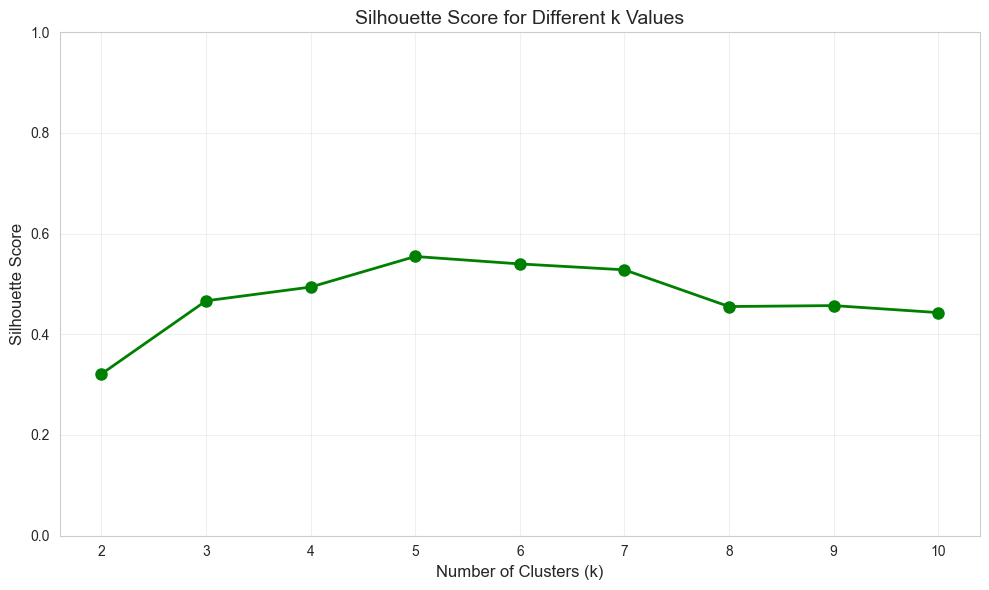

Silhouette scores:
k=2: 0.3213
k=3: 0.4666
k=4: 0.4939
k=5: 0.5547
k=6: 0.5399
k=7: 0.5281
k=8: 0.4552
k=9: 0.4571
k=10: 0.4432

Optimal number of clusters (based on silhouette): k=5


In [25]:
if df is not None:
    # Computing silhouette scores for different k values
    silhouette_scores = []
    K_range_silhouette = range(2, 11)
    
    for k in K_range_silhouette:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    
    # Plotting silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(K_range_silhouette, silhouette_scores, 'go-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title('Silhouette Score for Different k Values', fontsize=14)
    plt.grid(alpha=0.3)
    plt.xticks(K_range_silhouette)
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.savefig('../outputs/silhouette_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('Silhouette scores:')
    for k, score in zip(K_range_silhouette, silhouette_scores):
        print(f'k={k}: {score:.4f}')
    
    optimal_k = K_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
    print(f'\nOptimal number of clusters (based on silhouette): k={optimal_k}')

## Training K-Means Model with Optimal k

In [26]:
if df is not None:
    # Using k=5 as optimal (based on elbow method and silhouette analysis)
    optimal_k = 5
    
    kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans_final.fit_predict(X_scaled)
    
    # Adding cluster labels to original dataframe
    df['Cluster'] = cluster_labels
    
    print(f'K-Means model trained with k={optimal_k}')
    print(f'Cluster centers (scaled): \n{kmeans_final.cluster_centers_}')
    print(f'\nCluster distribution:')
    print(df['Cluster'].value_counts().sort_index())
    print(f'\nFinal silhouette score: {silhouette_score(X_scaled, cluster_labels):.4f}')

K-Means model trained with k=5
Cluster centers (scaled): 
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Final silhouette score: 0.5547


## Visualizing Clusters

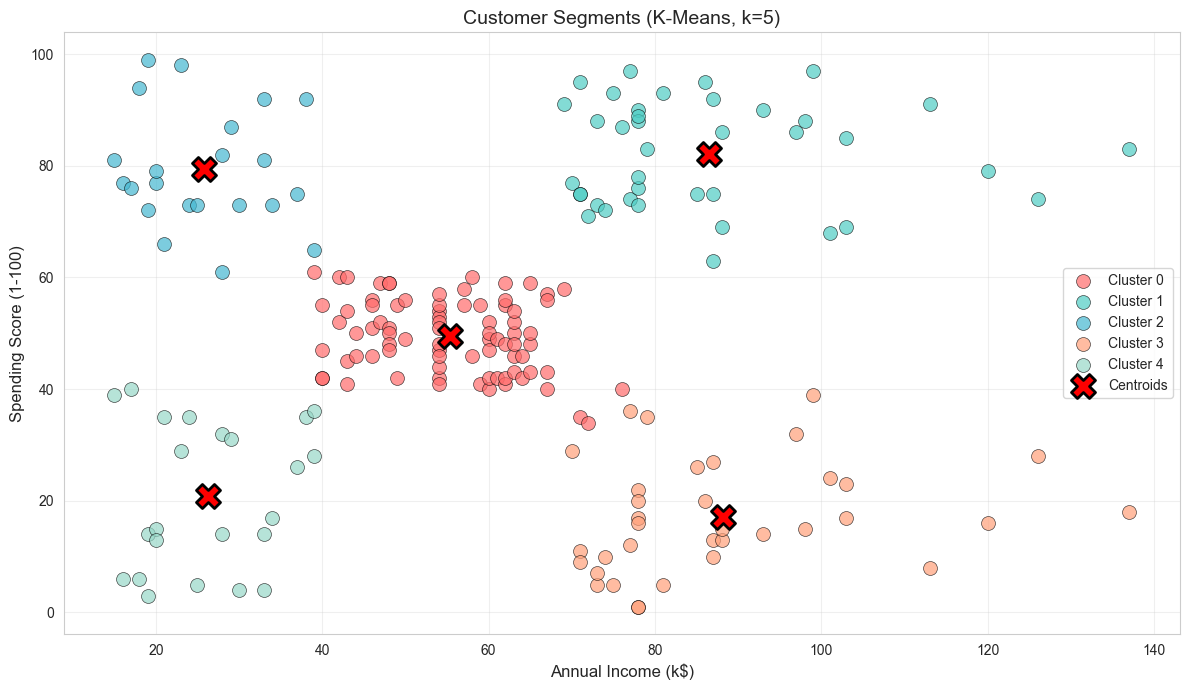

In [27]:
if df is not None:
    # 2D scatter plot of clusters
    plt.figure(figsize=(12, 7))
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    for cluster in range(optimal_k):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   c=colors[cluster], 
                   label=f'Cluster {cluster}',
                   s=100, 
                   alpha=0.7,
                   edgecolors='black',
                   linewidth=0.5)
    
    # Plot centroids
    centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
    plt.scatter(centroids_original[:, 0], 
               centroids_original[:, 1],
               c='red', 
               marker='X', 
               s=300,
               edgecolors='black',
               linewidth=2,
               label='Centroids')
    
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel('Spending Score (1-100)', fontsize=12)
    plt.title(f'Customer Segments (K-Means, k={optimal_k})', fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs/cluster_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

## Cluster Profiling - Customer Personas

In [28]:
if df is not None:
    # Analyzing cluster characteristics
    print("=" * 80)
    print("CUSTOMER SEGMENT PROFILES")
    print("=" * 80)
    
    for cluster in range(optimal_k):
        cluster_data = df[df['Cluster'] == cluster]
        
        print(f"\nCluster {cluster} - Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
        print("-" * 80)
        print(f"  Age:              Mean = {cluster_data['Age'].mean():.1f}, Range = {cluster_data['Age'].min()}-{cluster_data['Age'].max()}")
        print(f"  Annual Income:    Mean = ${cluster_data['Annual Income (k$)'].mean():.1f}k, Range = ${cluster_data['Annual Income (k$)'].min():.1f}k-${cluster_data['Annual Income (k$)'].max():.1f}k")
        print(f"  Spending Score:   Mean = {cluster_data['Spending Score (1-100)'].mean():.1f}, Range = {cluster_data['Spending Score (1-100)'].min():.0f}-{cluster_data['Spending Score (1-100)'].max():.0f}")
        print(f"  Gender:           {cluster_data['Gender'].value_counts().to_dict()}")
    
    print("\n" + "=" * 80)

CUSTOMER SEGMENT PROFILES

Cluster 0 - Size: 81 customers (40.5%)
--------------------------------------------------------------------------------
  Age:              Mean = 42.7, Range = 18-70
  Annual Income:    Mean = $55.3k, Range = $39.0k-$76.0k
  Spending Score:   Mean = 49.5, Range = 34-61
  Gender:           {'F': 48, 'M': 33}

Cluster 1 - Size: 39 customers (19.5%)
--------------------------------------------------------------------------------
  Age:              Mean = 32.7, Range = 27-40
  Annual Income:    Mean = $86.5k, Range = $69.0k-$137.0k
  Spending Score:   Mean = 82.1, Range = 63-97
  Gender:           {'F': 21, 'M': 18}

Cluster 2 - Size: 22 customers (11.0%)
--------------------------------------------------------------------------------
  Age:              Mean = 25.3, Range = 18-35
  Annual Income:    Mean = $25.7k, Range = $15.0k-$39.0k
  Spending Score:   Mean = 79.4, Range = 61-99
  Gender:           {'F': 13, 'M': 9}

Cluster 3 - Size: 35 customers (17.5%)
-

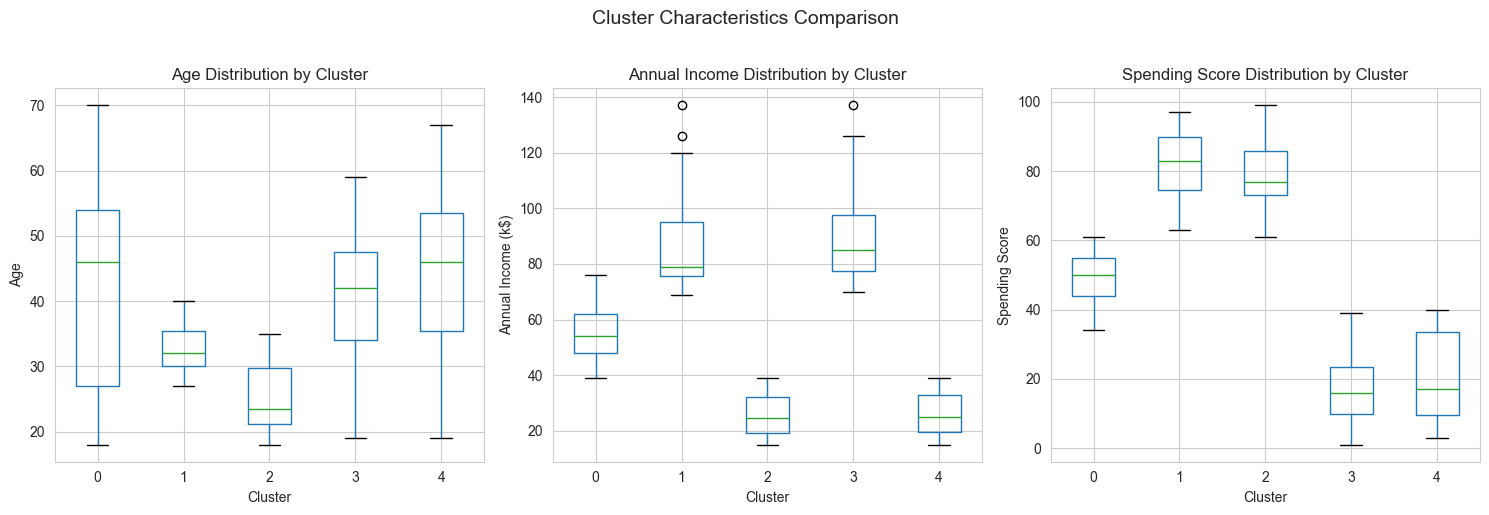

In [29]:
if df is not None:
    # Box plots comparing clusters
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    df.boxplot(column='Age', by='Cluster', ax=axes[0])
    axes[0].set_title('Age Distribution by Cluster')
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Age')
    
    df.boxplot(column='Annual Income (k$)', by='Cluster', ax=axes[1])
    axes[1].set_title('Annual Income Distribution by Cluster')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Annual Income (k$)')
    
    df.boxplot(column='Spending Score (1-100)', by='Cluster', ax=axes[2])
    axes[2].set_title('Spending Score Distribution by Cluster')
    axes[2].set_xlabel('Cluster')
    axes[2].set_ylabel('Spending Score')
    
    plt.suptitle('Cluster Characteristics Comparison', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig('../outputs/cluster_profiles.png', dpi=300, bbox_inches='tight')
    plt.show()

## Save Model and Scaler

In [30]:
import joblib
import os

if df is not None:
    os.makedirs('../model/', exist_ok=True)
    
    joblib.dump(kmeans_final, '../model/kmeans_model.pkl')
    joblib.dump(scaler, '../model/scaler.pkl')
    
    print('Model and scaler saved successfully')
    print('Files saved:')
    print('  - ../model/kmeans_model.pkl')
    print('  - ../model/scaler.pkl')

Model and scaler saved successfully
Files saved:
  - ../model/kmeans_model.pkl
  - ../model/scaler.pkl


## Predict Customer Segment for New Customer

In [31]:
if df is not None:
    # Predicting cluster for new customers
    new_customers = pd.DataFrame({
        'Annual Income (k$)': [50, 120, 75, 30],
        'Spending Score (1-100)': [30, 80, 60, 45]
    })
    
    new_customers_scaled = scaler.transform(new_customers)
    new_clusters = kmeans_final.predict(new_customers_scaled)
    
    print('Predicting clusters for new customers:')
    print("\nNew Customer Data:")
    print(new_customers)
    print("\nPredicted Clusters:")
    for i, cluster in enumerate(new_clusters):
        print(f"Customer {i+1}: Cluster {cluster}")

Predicting clusters for new customers:

New Customer Data:
   Annual Income (k$)  Spending Score (1-100)
0                  50                      30
1                 120                      80
2                  75                      60
3                  30                      45

Predicted Clusters:
Customer 1: Cluster 0
Customer 2: Cluster 1
Customer 3: Cluster 0
Customer 4: Cluster 4


## Final Summary Report

In [32]:
if df is not None:
    summary = f"""
================================================================================
TASK 2: CUSTOMER SEGMENTATION - FINAL SUMMARY
================================================================================

Dataset Overview:
- Total Records: {len(df)}
- Features Used: Annual Income, Spending Score
- Optimal Clusters: {optimal_k}
- Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}

Clustering Algorithm:
- Method: K-Means Clustering
- Initialization: K-Means++ (smart center initialization)
- Distance Metric: Euclidean Distance
- Feature Scaling: StandardScaler (normalized to mean=0, std=1)

Cluster Distribution:
{df['Cluster'].value_counts().sort_index().to_string()}

Model Performance:
- Inertia (Final): {kmeans_final.inertia_:.2f}
- Number of Iterations: {kmeans_final.n_iter_}

Outputs Generated:
- distributions.png (feature distributions)
- correlation.png (feature correlations)
- elbow_method.png (optimal k determination)
- silhouette_analysis.png (cluster quality scores)
- cluster_visualization.png (2D cluster plot)
- cluster_profiles.png (box plots by cluster)
- kmeans_model.pkl (trained model)
- scaler.pkl (feature scaler)

Cluster Centers (Original Scale):
{pd.DataFrame(centroids_original, columns=['Annual Income (k$)', 'Spending Score (1-100)']).to_string()}

================================================================================
"""
    
    print(summary)
    
    with open('../outputs/summary.txt', 'w') as f:
        f.write(summary)
    
    print('Summary saved to summary.txt')


TASK 2: CUSTOMER SEGMENTATION - FINAL SUMMARY

Dataset Overview:
- Total Records: 200
- Features Used: Annual Income, Spending Score
- Optimal Clusters: 5
- Silhouette Score: 0.5547

Clustering Algorithm:
- Method: K-Means Clustering
- Initialization: K-Means++ (smart center initialization)
- Distance Metric: Euclidean Distance
- Feature Scaling: StandardScaler (normalized to mean=0, std=1)

Cluster Distribution:
Cluster
0    81
1    39
2    22
3    35
4    23

Model Performance:
- Inertia (Final): 65.57
- Number of Iterations: 4

Outputs Generated:
- distributions.png (feature distributions)
- correlation.png (feature correlations)
- elbow_method.png (optimal k determination)
- silhouette_analysis.png (cluster quality scores)
- cluster_visualization.png (2D cluster plot)
- cluster_profiles.png (box plots by cluster)
- kmeans_model.pkl (trained model)
- scaler.pkl (feature scaler)

Cluster Centers (Original Scale):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296   